# MultiLayer Perceptron training

In [118]:
# import necessary dataset

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix,cohen_kappa_score


In [2]:
iris_data = load_iris()

In [3]:
list(iris_data)

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

# train test and split

In [110]:
random.seed(123)

train_porcent = 80 # Training Percent 
test_porcent = 20 # Test percent
iris_dataset = np.column_stack((iris_data.data,iris_data.target.T)) #Join X and Y
#iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)


In [111]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_dataset[:, :4], iris_dataset[:,4], test_size=0.20, random_state=42)

In [112]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import random

class MultiLayerPerceptron(BaseEstimator, ClassifierMixin): 
    def __init__(self, params=None):     
        if (params == None):
            self.inputLayer = 4                        # Input Layer
            self.hiddenLayer1 = 5 
            self.hiddenLayer1 = 4                      # Hidden Layer
            self.outputLayer = 3                       # Outpuy Layer
            self.learningRate = 0.00005                  # Learning rate
            self.max_epochs = 600                      # Epochs
            #self.BiasHiddenValue = -1                   # Bias HiddenLayer
            #self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Activation function
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer1 = params['HiddenLayer1']
            self.hiddenLayer2 = params['HiddenLayer2']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocas']
            #self.BiasHiddenValue = params['BiasHiddenValue']
            #self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction']]
            self.deriv = self.derivada[params['ActivationFunction']]
        
        'Starting Bias and Weights'
        self.WEIGHT_hidden1 = self.starting_weights(self.hiddenLayer1, self.inputLayer)
        self.WEIGHT_hidden2 = self.starting_weights(self.hiddenLayer2, self.hiddenLayer1)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer2)
        self.BIAS_hidden1 = np.array([random.uniform(-1/np.sqrt(self.hiddenLayer1),1/np.sqrt(self.hiddenLayer1)) for i in range(self.hiddenLayer1)])
        self.BIAS_hidden2 = np.array([random.uniform(-1/np.sqrt(self.hiddenLayer2),1/np.sqrt(self.hiddenLayer2)) for i in range(self.hiddenLayer2)])
        self.BIAS_output = np.array([random.uniform(-1/np.sqrt(self.OutputLayer),1/np.sqrt(self.OutputLayer)) for i in range(self.OutputLayer)])
        self.classes_number = 3 
        self.k_coeff = np.asarray([random.uniform(-1/np.sqrt(3),1/np.sqrt(3)) for i in range(3)])
        
    pass
    
    def starting_weights(self, x, y):
        return [[random.uniform(-np.sqrt(6)/np.sqrt(x+y), np.sqrt(6)/np.sqrt(x+y)) for i in range(x)] for j in range(y)]

    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
            'ada_act': (lambda x, y: y[0] + y[1]*x),
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0)),
            'ada_act': (lambda x, y: y[1]),
               }
 
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        'Stage 1 - Error: OutputLayer'
        #ERROR_output = self.output - self.OUTPUT_L3
        log_out = -np.log(self.OUTPUT_L3)
        ERROR_output = (self.output * log_out)
        #ERROR_output[np.isnan(ERROR_output)] = 0.0000001
        ERROR_output[np.isneginf(ERROR_output)] = -200000
        ERROR_output = np.round(ERROR_output, 5) + 0.0000001
        DELTA_output = ((-1)*(self.output/ERROR_output) * self.derivada["sigmoid"](self.OUTPUT_L3))
        DELTA_output[np.isnan(DELTA_output)] = 0.0000001
        DELTA_output[np.isneginf(DELTA_output)] = -200000
        DELTA_output = np.round(DELTA_output, 5)
        #print(f"DELTA_output:- {DELTA_output}")
        
        arrayStore = []
        'Stage 2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hiddenLayer2):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
        
        'Stage 3 - Error: HiddenLayer2'
        da2 = np.matmul(self.WEIGHT_output, DELTA_output)
        delta_hidden2 = da2* self.deriv(self.OUTPUT_L2, self.k_coeff)
        delta_hidden2 = np.round(delta_hidden2, 5)
        'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer2):
                self.WEIGHT_hidden2[i][j] -= (self.learningRate * (delta_hidden2[j] * x[i]))
                self.BIAS_hidden2[j] -= (self.learningRate * delta_hidden2[j])

        self.WEIGHT_hidden2 = np.round(self.WEIGHT_hidden2, 5)
        self.BIAS_hidden2 = np.round(self.BIAS_hidden2, 5)
        'Stage 5 - Error: HiddenLayer1'
        da1 = np.matmul(self.WEIGHT_hidden2, delta_hidden2)
        delta_hidden1 = da1 * self.deriv(self.OUTPUT_L1, self.k_coeff)
        delta_hidden1 = np.round(delta_hidden1, 5)
        'Stage 6 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer1):
                self.WEIGHT_hidden1[i][j] -= (self.learningRate * (delta_hidden1[j] * x[i]))
                self.BIAS_hidden1[j] -= (self.learningRate * delta_hidden1[j])
        
        self.WEIGHT_hidden1 = np.round(self.WEIGHT_hidden1, 5)
        self.BIAS_hidden1 = np.round(self.BIAS_hidden1, 5)
        DELTA_K_COEFF = np.asarray([np.mean(da1), np.mean(da1*self.z1), np.mean(da1*np.square(self.z1))])
        self.k_coeff -=  self.learningRate*DELTA_K_COEFF  
        self.k_coeff = np.round(self.k_coeff, 10)
        #print(f"self.k_coeff:- {self.k_coeff}")
                
    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()

    def predict(self, X, y):
        'Returns the predictions for every element of X'
        my_predictions = []
        'Forward Propagation'
        forward = np.matmul(X,self.WEIGHT_hidden1) + self.BIAS_hidden1
        forward = np.matmul(forward,self.WEIGHT_hidden2) + self.BIAS_hidden2
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
                                 
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])    
        return my_predictions
      

    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        #W0 = []
        #W1 = []
        K1 = []
        K2 = []
        same_count = 0
        prev_error = 10000000
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                'Stage 1 - (Forward Propagation)'
                self.z1 = (np.dot(inputs, self.WEIGHT_hidden1) + self.BIAS_hidden1.T) #z1
                self.OUTPUT_L1 = self.activation(self.z1, self.k_coeff) 
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_hidden2) + self.BIAS_hidden2.T), self.k_coeff)
                self.OUTPUT_L3 = self.ativacao['sigmoid']((np.dot(self.OUTPUT_L2, self.WEIGHT_output) + self.BIAS_output.T))
                'Stage 2 - One-Hot-Encoding'
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}
                
                log_error = 0
                for i in range(self.OutputLayer):
                    #erro = (self.output[i] - self.OUTPUT_L3[i])**2
                    log_out = -np.log(self.OUTPUT_L3[i])
                    erro = self.output[i] * log_out
                    #log_error = #(log_error + (0.05 * erro))
                    log_error += erro
                total_error += log_error/self.OutputLayer
         
                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            if total_error>prev_error and count_epoch!=1:
                same_count = 0
                #print(f"total_error:- {total_error}, prev_error:- {prev_error}")
                prev_error = total_error
                self.learningRate /=1.3
                print(f"Error started increasing so learning rate decreasing to {self.learningRate}")
                self.WEIGHT_hidden1 = self.prev_WEIGHT_hidden1
                self.WEIGHT_hidden2 = self.prev_WEIGHT_hidden2 
                self.WEIGHT_output = self.prev_WEIGHT_output 
                self.BIAS_hidden1 = self.prev_BIAS_hidden1 
                self.BIAS_hidden2 = self.prev_BIAS_hidden2 
                self.BIAS_output = self.prev_BIAS_output
                self.k_coeff = self.prev_k_coeff
            elif total_error==prev_error:
                same_count +=1
                #self.learningRate *=np.log(count_epoch)
                #prev_error = total_error
            else:  
                same_count = 0
                prev_error = total_error
                self.prev_WEIGHT_hidden1 = self.WEIGHT_hidden1
                self.prev_WEIGHT_hidden2 = self.WEIGHT_hidden2
                self.prev_WEIGHT_output = self.WEIGHT_output
                self.prev_BIAS_hidden1 = self.BIAS_hidden1
                self.prev_BIAS_hidden2 = self.BIAS_hidden2 
                self.prev_BIAS_output = self.BIAS_output 
                self.prev_k_coeff = self.k_coeff
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            #W0.append(self.WEIGHT_hidden2)
            #W1.append(self.WEIGHT_output)
            K1.append(self.k_coeff[0])
            K2.append(self.k_coeff[1])
             
                
            count_epoch += 1
            if same_count==5:
                print(f"breaking at epoch since loss was not decreaasing:- {count_epoch}")
                break
        self.show_err_graphic(error_array,epoch_array)

        plt.plot(K1)
        plt.title('Activation K!')
        plt.ylabel('Value Weight')
        plt.xlabel('Number of epoch')
        plt.show()

        plt.plot(K2)
        plt.title('Activation K2')
        plt.ylabel('Value Weight')
        plt.xlabel('Number of epoch')
        plt.show()

        return self


Epoch  1 - Total Error:  0.3163665865381209
Error started increasing so learning rate decreasing to 1.5384615384615384e-05
Epoch  50 - Total Error:  0.2961191807493402
Epoch  100 - Total Error:  0.27130281452627647
Epoch  150 - Total Error:  0.246142062812819
Epoch  200 - Total Error:  0.22128042506997544
Epoch  250 - Total Error:  0.19753441368912192
Epoch  300 - Total Error:  0.17730037693010722
Epoch  350 - Total Error:  0.16286056047868724
Error started increasing so learning rate decreasing to 1.1834319526627217e-05
Error started increasing so learning rate decreasing to 9.103322712790166e-06
Epoch  400 - Total Error:  0.15836387651101005
Error started increasing so learning rate decreasing to 7.0025559329155125e-06
Error started increasing so learning rate decreasing to 5.386581486858086e-06
Error started increasing so learning rate decreasing to 4.143524220660066e-06
Error started increasing so learning rate decreasing to 3.187326323584666e-06
Epoch  450 - Total Error:  0.157105

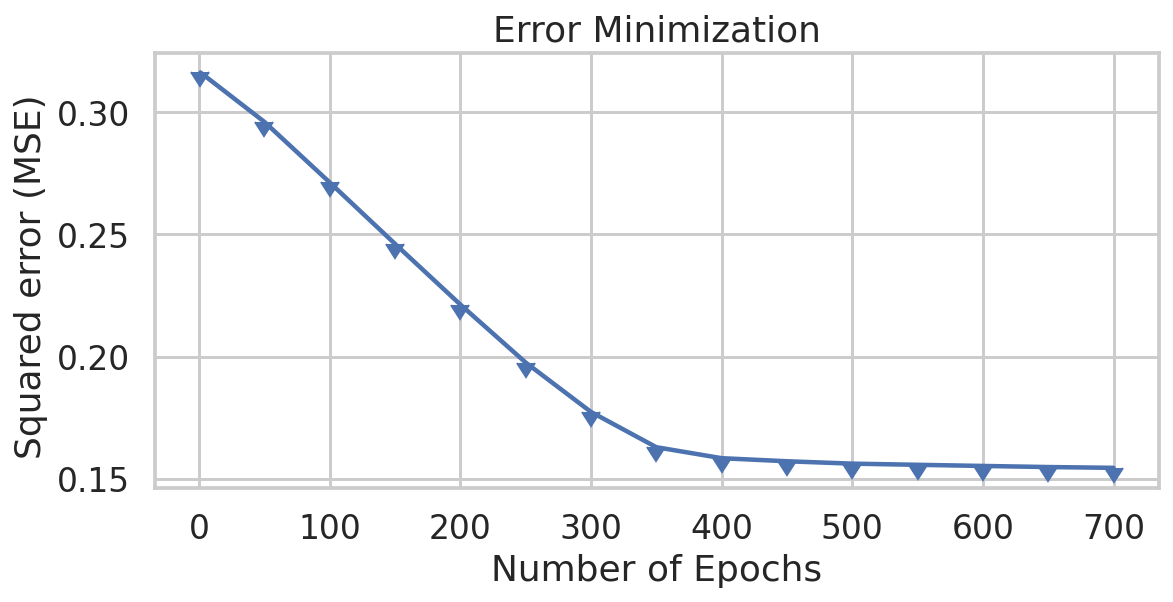

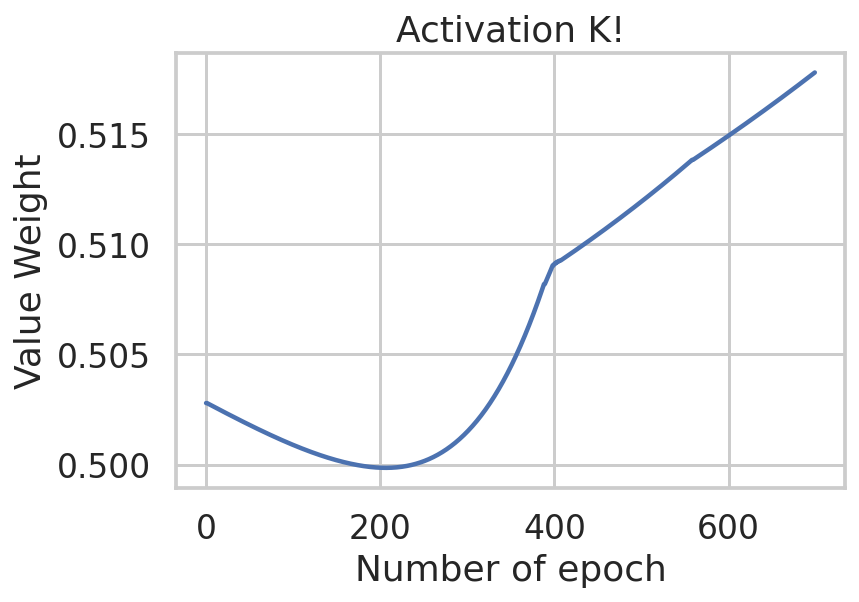

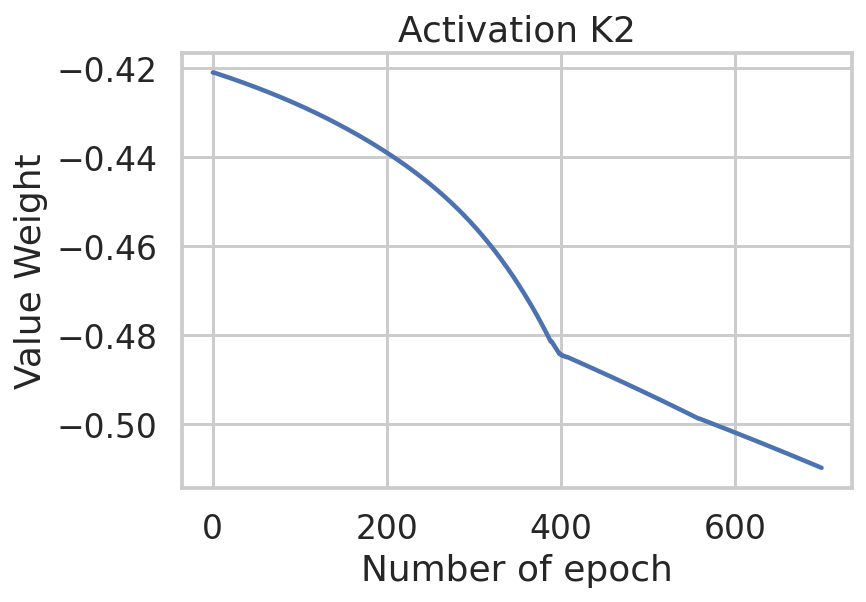

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


MultiLayerPerceptron(params=None)

In [113]:
dictionary = {'InputLayer':4, 'HiddenLayer1':5,  'HiddenLayer2':4, 'OutputLayer':3,
              'Epocas':700, 'LearningRate':0.00002, 'ActivationFunction':'ada_act'} #0.00002

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)



In [114]:
prev = Perceptron.predict(test_X,test_y)
hits = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_set += 1
    elif(test_y[j] == 1): n_vers += 1
    elif(test_y[j] == 2): n_virg += 1
        
for i in range(len(test_y)):
    if test_y[i] == prev[i]: 
        hits += 1
    if test_y[i] == prev[i] and test_y[i] == 0:
        score_set += 1
    elif test_y[i] == prev[i] and test_y[i] == 1:
        score_vers += 1
    elif test_y[i] == prev[i] and test_y[i] == 2:
        score_virg += 1    
         
hits = (hits / len(test_y))*100
faults = 100 - hits

Porcents : 86.67 % hits and 13.33 % faults
Total samples of test 30
*Iris-Setosa: 21 samples
*Iris-Versicolour: 8 samples
*Iris-Virginica: 1 samples


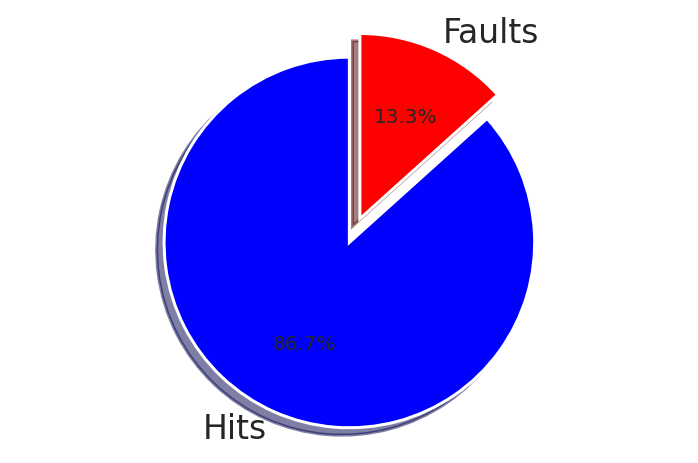

In [115]:
n_samples = len(test_X)
graph_hits = []
print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",n_samples)
print("*Iris-Setosa:",n_set,"samples")
print("*Iris-Versicolour:",n_vers,"samples")
print("*Iris-Virginica:",n_virg,"samples")

graph_hits.append(hits)
graph_hits.append(faults)
labels = 'Hits', 'Faults';
sizes = [96.5, 3.3]
explode = (0, 0.14)

fig1, ax1 = plt.subplots();
ax1.pie(graph_hits, explode=explode,colors=['blue','red'],labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.show()


- Acurracy Iris-Setosa: 100.00 %
- Acurracy Iris-Versicolour: 62.50 %
- Acurracy Iris-Virginica: 0.00 %


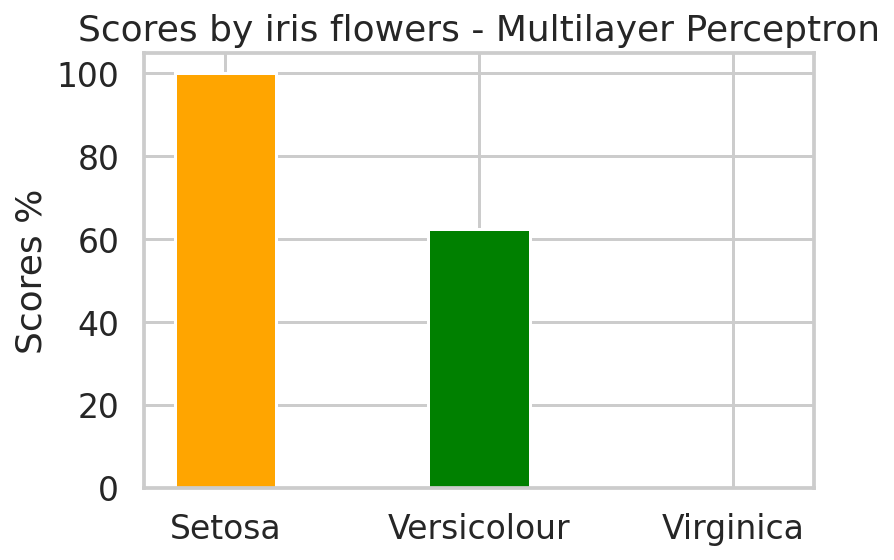

In [116]:
acc_set = (score_set/n_set)*100
acc_vers = (score_vers/n_vers)*100
acc_virg = (score_virg/n_virg)*100
print("- Acurracy Iris-Setosa:","%.2f"%acc_set, "%")
print("- Acurracy Iris-Versicolour:","%.2f"%acc_vers, "%")
print("- Acurracy Iris-Virginica:","%.2f"%acc_virg, "%")
names = ["Setosa","Versicolour","Virginica"]
x1 = [2.0,4.0,6.0]
fig, ax = plt.subplots()
r1 = plt.bar(x1[0], acc_set,color='orange',label='Iris-Setosa')
r2 = plt.bar(x1[1], acc_vers,color='green',label='Iris-Versicolour')
r3 = plt.bar(x1[2], acc_virg,color='purple',label='Iris-Virginica')
plt.ylabel('Scores %')
plt.xticks(x1, names);plt.title('Scores by iris flowers - Multilayer Perceptron')
plt.show()


In [121]:
cm = confusion_matrix(test_y, prev)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))
#confusionmatrix = np.matrix(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))
TPR = TP/(TP+FN)
print('Sensitivity \n {}'.format(TPR))
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Acc = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Acc))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))
k=cohen_kappa_score(test_y, prev)
print('Çohen Kappa \n{}'.format(k))

  21   0   0
   3   5   0
   0   1   0
False Positives
 [3 1 0]
False Negetives
 [0 3 1]
True Positives
 [21  5  0]
True Negetives
 [ 6 21 29]
Sensitivity 
 [1.    0.625 0.   ]
Specificity 
 [0.66666667 0.95454545 1.        ]
Precision 
 [0.875      0.83333333        nan]
Recall 
 [1.    0.625 0.   ]
Áccuracy 
[0.9        0.86666667 0.96666667]
FScore 
[0.93333333 0.71428571        nan]
Çohen Kappa 
0.6551724137931034


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
